<a href="https://colab.research.google.com/github/CataSiches/DataScieceIII-SichesCatalina/blob/main/Proyecto_DataScience_III_Catalina_Siches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción de géneros de libros a partir de su descripción.

# 1. Descripción del problema del negocio

###Cada año se publican entre 2.2 y 4  millones de libros en el mundo, de historias que buscan llegar a los ojos de millones de lectores. Cada uno de estos potenciales lectores tiene gustos personales, preferencias que influyen directamente en la eleccion de los libros que decide leer.

###Al momento de su publicación, los libros suelen presentarse acompaados de un resumen o descripción cuyo objetivo es ofrecer una primera apoximación a la trama y despertar el interés del lector. Por otro lado, los libros son clasificados en uno o más géneros literario, lo que facilita la búsqueda y recomendación de lecturas acordes a las preferencias individuales.

###En este contexto surge la siguiente pregunta de investigación:
###¿Existen relaciones entre la forma o palabras utilizadas en los resumenes de libros y el género prinicipal en el cual fueron categorizados?¿Son esta relaciones suficientes para entrenar modelos de aprendizaje supervisado con resultados positivos?

###Con el siguiente trabajo se busca responder:
###¿Hay palabras que representan con mayor frecuencia el género principal en el cual fueron categorizados?


# 2. Objetivo General

###Para abordar estas preguntas se emplearán técnicas de Procesamiento del Lenguaje Natural(NLP), y de normalización de textos. Construyendo, luego, modelos de Machine Learning y de DeepLearning que puedan potencialmente predecir el género del libro a partir de la descripción textual del mismo.



# 3. Origen de los datos

###El DataSet a utilizar para la creación y entrenamiento del modelo fue encontrado en Kaggle (https://www.kaggle.com/).

###Fuente:

###Goodreads' Best Books Ever 📚

###https://www.kaggle.com/datasets/arnabchaki/goodreads-best-books-ever

###Columnas Iniciales:
- Title: Titulo del libro
- Serie: Nombre de la serie a la que pertenence el libro
- Author: Nombre del autor
- Rating: Puntaje del libro
- Description: Resumen o descripción del libro
- Language: Lenguaje del libro
- Isbn: codigo único del libro
- Genres: géneros en los que está clasificado el libro
- Characteres: Personajes principales del libro
- BookFormat: formato en el que se publica el libro
- Edition: número de edición
- Pages: Cantidad de palabras
- Publisher: Editioral de publicación
- PublishDate: Fecha de publicación
- FistPublishDate: Fecha de primera publicación
- Awards: Premios ganados
- NumRatings: cantidad de puntajes/ratings
- Ratings by stars: cantidad de votaciones por estrellas
- LikedPrecent: Porcentaje de opiniones positivas sobre el libro
- Setting: Locación de la historia
- BbeScore: Best Books Ever, Mejores libros, libros recomendados
- BbeVotes: Votos recibidos
- Price: Precio del libro

Se seleccionaron los libros en inglés para unificar el idioma de las descripciones, y eliminaron aquellos registros que poseían datos nulos que fueran de importancia. Luego se tomo una muestra del dataframe dejando el 60% de los registros. Con el objetivo de tener una cantidad de registros suficientes para el analísis sin sobrecargar el modelo que tiene un proposito educativo.

###Columnas Finales:
- Main Genre (Labels): se extrajo el primer género de la columna 'genres' que es el que más identifica al libro.
- Description (Text): Las descripciones fueron normalizadas, poniendo las palabras en minusculas, retirando caracteres no alfanumericos, tokenizando los textos, retirando stopword comunes y personalizadas, y lematizando las palabras.

# 4. Librerías a utilizar

In [66]:
# Librerías a utilizar en lasa diferentes etapas del proyecto

# Descarga y exploración
import pandas as pd
import numpy as np
from collections import Counter

# Normalización
import re
import ast

# NLP
import nltk
nltk.download('punkt')  # Descargamos el paquete de tokenización de NLTK
nltk.download('punkt_tab')  # Descargamos el paquete de tokenización de NLTK
from nltk.tokenize import word_tokenize # Desde el módulo nltk.tokenize, quiero importar solo la función word_tokenize
nltk.download('stopwords') # Descargamos el paquete de stopwords de NLTK
from nltk.corpus import stopwords # Desde el módulo nltk.corpus, quiero importar solo la función stopwords
nltk.download('wordnet') # Descargamos el paquete de lematización de NLTK
from nltk.stem import WordNetLemmatizer # Desde el módulo nltk.stem, quiero importar solo la función WordNetLemmatizer
import spacy

# Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Machine Learning clásico
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, log_loss
from sklearn.utils.class_weight import compute_class_weight

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 5. Desarrollo

El proyecto se estructura en dos etapas principales.
En la primera etapa se realiza la exploración, limpieza y normalización del dataset, con el objetivo de preparar los datos textuales y garantizar condiciones adecuadas para el posterior entrenamiento de los modelos. Esta etapa incluye tareas de preprocesamiento necesarias para optimizar el desempeño de los modelos de Machine Learning y Deep Learning que serán implementados.

En la segunda etapa, los datos preprocesados son utilizados para entrenar diferentes modelos de clasificación, cuyos resultados son comparados entre sí con el fin de analizar su desempeño y determinar cuál de ellos ofrece mejores resultados para el problema planteado.

## 5a. Etapa 1 : Exploración, NLP

En esta primera etapa nos centraremos en l apreparación y el análisis exploratorio de los datos textuales. Comenzamos con la descarga del DataSet, seguida de una exploración inicial general para comprender la estructura, sus variables y distribución de los datos.
Luego, nos enfocaremos en las variables relevantes para el análisis, llevando a cabo tareas de limpiza, adecuación y normalización del texto, con el objetivo de estandarizar el contenido y reducir ruido lingüistico.


### 5a.1. Descarga de DataSet

In [2]:
# Dercarga desde drive
# Link: https://drive.google.com/file/d/1Q-FWd8li5qgrWDZZ43a18nJyO4fx7cMd/view?usp=sharing

!gdown --id 1Q-FWd8li5qgrWDZZ43a18nJyO4fx7cMd

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:139: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Q-FWd8li5qgrWDZZ43a18nJyO4fx7cMd
To: /content/books_1.Best_Books_Ever.csv
100% 65.2M/65.2M [00:00<00:00, 81.2MB/s]


In [3]:
# Transformación a DataFrame
df = pd.read_csv('books_1.Best_Books_Ever.csv')

### 5a.2. Exploración del DataFrame

Observación de la estructura y composición del DataSet mediante codigos sencillos.

In [4]:
# Corroborar carga correcta
df.head()

,title,series,author,rating,description,language,isbn,genres,characters,bookFormat,...,publishDate,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,bbeScore,bbeVotes,price
0,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9.78044E+12,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,...,09/14/08,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",2993816,30516,5.09
1,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9.78044E+12,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,...,09/28/04,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,2632233,26923,7.38
2,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,1E+13,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,...,05/23/06,07-11-1960,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",2269402,23328,NaN
3,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,1E+13,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",Paperback,...,10-10-2000,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",1983116,20452,NaN
4,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9.78032E+12,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,...,09-06-2006,10-05-2005,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",1459448,14874,2.1


In [5]:
# Forma del DataSet
df.shape

(52478, 23)

In [6]:
# Información
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             52478 non-null  object 
 1   series            23470 non-null  object 
 2   author            52478 non-null  object 
 3   rating            52478 non-null  float64
 4   description       51140 non-null  object 
 5   language          48672 non-null  object 
 6   isbn              52478 non-null  object 
 7   genres            52478 non-null  object 
 8   characters        52478 non-null  object 
 9   bookFormat        51005 non-null  object 
 10  edition           4955 non-null   object 
 11  pages             50131 non-null  object 
 12  publisher         48782 non-null  object 
 13  publishDate       51598 non-null  object 
 14  firstPublishDate  31152 non-null  object 
 15  awards            52478 non-null  object 
 16  numRatings        52478 non-null  int64 

In [7]:
# Columnas
df.columns

Index(['title', 'series', 'author', 'rating', 'description', 'language',
       'isbn', 'genres', 'characters', 'bookFormat', 'edition', 'pages',
       'publisher', 'publishDate', 'firstPublishDate', 'awards', 'numRatings',
       'ratingsByStars', 'likedPercent', 'setting', 'bbeScore', 'bbeVotes',
       'price'],
      dtype='object')

In [8]:
# Nulos
df.isnull().sum()

,0
title,0
series,29008
author,0
rating,0
description,1338
language,3806
isbn,0
genres,0
characters,0
bookFormat,1473


Se observa un DataSet de 52.478 registros y 23 columnas. El tamaño del DataSet y los detalles que ofrece el mismo nos permite plantear diferentes potenciales modelos de investigación, aunque algunas columnas presentan un amplio número de nulos. Teniendo en cuenta el objetivo de este proyecto se puede definir que la mayoría de las columnas no aportan datos relevantes.

### 5a.3. Definición de las variables

In [9]:
# Observar Variable Description
df['description']

,description
0,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...
1,There is a door at the end of a silent corrido...
2,The unforgettable novel of a childhood in a sl...
3,Alternate cover edition of ISBN 9780679783268S...
4,About three things I was absolutely positive.\...
...,...
52473,The Fateful Trilogy continues with Fractured. ...
52474,"'Anasazi', sequel to 'The Thirteenth Chime' by..."
52475,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...
52476,A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...


In [10]:
# Observar Variable genre
df['genres']

,genres
0,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas..."
1,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',..."
2,"['Classics', 'Fiction', 'Historical Fiction', ..."
3,"['Classics', 'Fiction', 'Romance', 'Historical..."
4,"['Young Adult', 'Fantasy', 'Romance', 'Vampire..."
...,...
52473,"['Vampires', 'Paranormal', 'Young Adult', 'Rom..."
52474,"['Mystery', 'Young Adult']"
52475,"['Fantasy', 'Young Adult', 'Paranormal', 'Ange..."
52476,"['Fiction', 'Mystery', 'Historical Fiction', '..."


Teniendo en cuenta el objetivo y las preguntas que nos guian las dos columnas que debemos preparar son:

- Variable Descripción(description): variable input para la predicción.
- Variable Género(genres): variable objetivo a predecir, variable supervisada.

Para lograrlo al principio necesitaremos otras columnas, como la del lenguaje.

### 5a.4. Limpieza y adecueación del DataFrame

En esta sección:

 - Se eliminan registros que presenten nulos en las variables definidas
 - Se aisla el género principal de la columna 'genres'
 - Se selecciona el 60% de los registros manteniendo su proporcionalidad en cada genero
 - Normalización y estandarización de textos
 - Viasualizaciones exploratorias

#### 5a.4a. Eliminar Nulos en columnas relevantes

Teniendo en cuenta que este trabajo tiene como contexto el aprendizaje dentro de un curso educativo, considero conveniente reducir el tamaño del DataFrame. Lo voy a realizar comenzando por aquellos registros con nulos en columnas con relevancía en el trabajo.

In [11]:
# 1ro quitar aquellos registros con nulos en la descripcion del libro
df_2 = df.dropna(subset=['description'])
df_2.isnull().sum()

,0
title,0
series,27863
author,0
rating,0
description,0
language,3473
isbn,0
genres,0
characters,0
bookFormat,1186


In [12]:
# Reducir a las columnas necesarias
df_3 = df_2[['title','description', 'genres', 'language']]
df_3.head()

,title,description,genres,language
0,The Hunger Games,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",English
1,Harry Potter and the Order of the Phoenix,There is a door at the end of a silent corrido...,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",English
2,To Kill a Mockingbird,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",English
3,Pride and Prejudice,Alternate cover edition of ISBN 9780679783268S...,"['Classics', 'Fiction', 'Romance', 'Historical...",English
4,Twilight,About three things I was absolutely positive.\...,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...",English


In [13]:
# Valores únicos de lenguaje
# Para facilitar el analísis voy a observar la cantidad de cada lenguaje
# Si la cantidad de registros lo permite voy a dejar solamente el lenguaje con mayor cantidad de registros
df_3['language'].value_counts()

,count
language,
English,42151
Arabic,949
Spanish,652
French,548
German,498
...,...
Mayan languages,1
Duala,1
Australian languages,1


In [14]:
# Dejar solamente aquellos registros en Ingles
df_3 = df_3[df_3['language'] == 'English']
df_3.head()

,title,description,genres,language
0,The Hunger Games,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",English
1,Harry Potter and the Order of the Phoenix,There is a door at the end of a silent corrido...,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",English
2,To Kill a Mockingbird,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",English
3,Pride and Prejudice,Alternate cover edition of ISBN 9780679783268S...,"['Classics', 'Fiction', 'Romance', 'Historical...",English
4,Twilight,About three things I was absolutely positive.\...,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...",English


In [15]:
# Shape
df_3.shape

(42151, 4)

#### 5a.4b. Aislar el Género Principal

- El análisis requiere reducir los generos al principal, es decir dejar solamente el primero que aparece en la lista. Para no tener multietiqueta.
- Para esto: voy a modificar la columna genres.
- Luego voy a reducir la cantidad de registros dejando los géneros literarios más prominentes, intentando dejar una muestra del dataframe de aproximadamente 10.000 - 15.000 registros.

In [16]:
# Corroborar que genres sea una lista
type(df_3['genres'].iloc[0])

str

In [17]:
# Transformar string a lista con librería ast
df_3 = df_3.copy()

df_3['genres'] = df_3['genres'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [18]:
# Corroborar modificación de tipo de registro
type(df_3['genres'].iloc[0])

list

In [19]:
# Extraer el género principal del libro
df_3['main_genre'] = df_3['genres'].str[0]
df_3.head()

,title,description,genres,language,main_genre
0,The Hunger Games,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...",English,Young Adult
1,Harry Potter and the Order of the Phoenix,There is a door at the end of a silent corrido...,"[Fantasy, Young Adult, Fiction, Magic, Childre...",English,Fantasy
2,To Kill a Mockingbird,The unforgettable novel of a childhood in a sl...,"[Classics, Fiction, Historical Fiction, School...",English,Classics
3,Pride and Prejudice,Alternate cover edition of ISBN 9780679783268S...,"[Classics, Fiction, Romance, Historical Fictio...",English,Classics
4,Twilight,About three things I was absolutely positive.\...,"[Young Adult, Fantasy, Romance, Vampires, Fict...",English,Young Adult


In [20]:
# Chequear nulos
df_3.isnull().sum()

,0
title,0
description,0
genres,0
language,0
main_genre,2582


In [21]:
# Observar nulos
df_3[df_3['main_genre'].isnull()]

,title,description,genres,language,main_genre
1483,Beg For Mercy,"The fight is on in this installment, Mercy is ...",[],English,NaN
2182,Complicated Moonlight,"In the second installment of the DCYE series, ...",[],English,NaN
2272,Song Bird: Matters of the Heart,"“I’m not Mavis anymore.” For years, song bird ...",[],English,NaN
2526,Jubal's Field Trip To Heaven: Jubal and Chanan...,This is an adventurous story about an 11-year-...,[],English,NaN
3023,Treacherous Estate,While enjoying his usual Friday night after di...,[],English,NaN
...,...,...,...,...,...
52337,Must the Young Die Too?,This book recounts the life of a young man fro...,[],English,NaN
52353,Diana Princess of Wales,A magnificent tribute to the Princess of Wales...,[],English,NaN
52402,Letters Home from The Crimea: A Young Cavalrym...,Among the British troops bound for the Black S...,[],English,NaN
52447,Princess Diana: The House of Windsor and Palm ...,Persons interested in the remarkable career of...,[],English,NaN


In [22]:
# Eliminar registros con main_genre nulo
# Por lo observado son nulos ya que no tienen ningun género asignado
df_3 = df_3.dropna(subset=['main_genre'])

# Eliminar columna de lenguaje
df_3 = df_3.drop(columns=['language'])

df_3.isnull().sum()

,0
title,0
description,0
genres,0
main_genre,0


In [23]:
# Forma del actual DataFrame
df_3.shape

(39569, 4)

#### 5a.4c. Reducción Final del DataFrame a partir del análisis de los géneros principales

In [24]:
# Observar cantidad de apariciones por género
# Top 10
df_3['main_genre'].value_counts()[:10]

,count
main_genre,
Fiction,4991
Fantasy,4857
Young Adult,2894
Romance,2826
Nonfiction,2118
Historical Fiction,1952
Mystery,1818
Science Fiction,1284
Classics,883


In [25]:
# Sumar las apariciones de los top 10
df_3['main_genre'].value_counts()[:10].sum()

np.int64(24400)

In [26]:
# Sumar las apariciones de los top 5
df_3['main_genre'].value_counts()[:5].sum()

np.int64(17686)

- La cantidad de registros en los géneros más utilizados es de 24400.
- La mayoría de los mismos se encuentra en los 5 géneros más utilizados.
- Es mi opinion que reducir el DataFrame a una cantidad de registros cercanos a 15000 retirando géneros en el top 10 comprometería la integridad del DataFrame y su utilidad para el desarrollo de los modelos de aprendizaje.
- En sustitución creo que sería mejor reducir al 60% los registros de cada género en el top 10, de manera aleatoria.

In [27]:
# Sacar los registros que no tengan género en el top 10
# Primero hacer una lista de estos géneros
top_10 = df_3['main_genre'].value_counts()[:10].index.tolist()

# Retirar los libros cuyo género no este ne la lista
df_3 = df_3[df_3['main_genre'].isin(top_10)]
df_3.shape

(24400, 4)

In [28]:
# Reducir DataFrame a la mitad sin comprometer el mismo
df_reducido = df_3.groupby('main_genre').apply(lambda x: x.sample(frac=0.6, random_state=42)).reset_index(drop=True)
df_reducido.shape

/tmp/ipython-input-1700535221.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_reducido = df_3.groupby('main_genre').apply(lambda x: x.sample(frac=0.6, random_state=42)).reset_index(drop=True)


(14640, 4)

In [29]:
# Corroborar df
df_reducido.head()

,title,description,genres,main_genre
0,Siddhartha,"Herman Hesse's classic novel has delighted, in...","[Classics, Fiction, Philosophy, Religion, Spir...",Classics
1,The Years,The most popular of Virginia Woolf's novels du...,"[Classics, Fiction, Literature, 20th Century, ...",Classics
2,A Fair Barbarian,Miss Belinda Bassett's niece arrives in a smal...,"[Classics, Fiction, Romance, Historical Fictio...",Classics
3,The Return of The Soldier,This is a masterful novel about a shell-shocke...,"[Classics, Fiction, Historical Fiction, War, W...",Classics
4,The Romance of the Forest,Set in a Roman Catholic Europe of violent pass...,"[Classics, Gothic, Fiction, Romance, 18th Cent...",Classics


In [30]:
# Cantidad de valores por columnas
df_reducido.count()

,0
title,14640
description,14640
genres,14640
main_genre,14640


In [31]:
# Cantidad por género
df_reducido['main_genre'].value_counts()

,count
main_genre,
Fiction,2995
Fantasy,2914
Young Adult,1736
Romance,1696
Nonfiction,1271
Historical Fiction,1171
Mystery,1091
Science Fiction,770
Classics,530


### 5a.5. Normalización de Datos

#### 5a.5a. Convertir todo el texto a mínuscula

In [32]:
# Convertir el texto a mínuscula
# Columna Descripción
df_reducido['description'] = df_reducido['description'].str.lower()
# Columna Género Principal
df_reducido['main_genre'] = df_reducido['main_genre'].str.lower()

df_reducido.head()

,title,description,genres,main_genre
0,Siddhartha,"herman hesse's classic novel has delighted, in...","[Classics, Fiction, Philosophy, Religion, Spir...",classics
1,The Years,the most popular of virginia woolf's novels du...,"[Classics, Fiction, Literature, 20th Century, ...",classics
2,A Fair Barbarian,miss belinda bassett's niece arrives in a smal...,"[Classics, Fiction, Romance, Historical Fictio...",classics
3,The Return of The Soldier,this is a masterful novel about a shell-shocke...,"[Classics, Fiction, Historical Fiction, War, W...",classics
4,The Romance of the Forest,set in a roman catholic europe of violent pass...,"[Classics, Gothic, Fiction, Romance, 18th Cent...",classics


#### 5a.5b. Remover caracteres no alfanúmericos

In [33]:
# Definir una función que remueva caracteres no alfanúmericos
def remove_punctuation(text):
    # Expresión regular para reemplazar cualquier signo de puntuación o símbolo no alfanumérico
     return re.sub(r'[^a-zA-Z0-9\s]', '', text)

# Aplicar la función a la columna 'review_lower'
df_reducido['descrip_puntuacion'] = df_reducido['description'].apply(remove_punctuation)
df_reducido.head()

,title,description,genres,main_genre,descrip_puntuacion
0,Siddhartha,"herman hesse's classic novel has delighted, in...","[Classics, Fiction, Philosophy, Religion, Spir...",classics,herman hesses classic novel has delighted insp...
1,The Years,the most popular of virginia woolf's novels du...,"[Classics, Fiction, Literature, 20th Century, ...",classics,the most popular of virginia woolfs novels dur...
2,A Fair Barbarian,miss belinda bassett's niece arrives in a smal...,"[Classics, Fiction, Romance, Historical Fictio...",classics,miss belinda bassetts niece arrives in a small...
3,The Return of The Soldier,this is a masterful novel about a shell-shocke...,"[Classics, Fiction, Historical Fiction, War, W...",classics,this is a masterful novel about a shellshocked...
4,The Romance of the Forest,set in a roman catholic europe of violent pass...,"[Classics, Gothic, Fiction, Romance, 18th Cent...",classics,set in a roman catholic europe of violent pass...


#### 5a.5c. Tokenización

In [34]:
# Tokenizar los valores de la columna descripción
df_reducido['descrip_token'] = df_reducido['descrip_puntuacion'].apply(word_tokenize)
df_reducido.head()

,title,description,genres,main_genre,descrip_puntuacion,descrip_token
0,Siddhartha,"herman hesse's classic novel has delighted, in...","[Classics, Fiction, Philosophy, Religion, Spir...",classics,herman hesses classic novel has delighted insp...,"[herman, hesses, classic, novel, has, delighte..."
1,The Years,the most popular of virginia woolf's novels du...,"[Classics, Fiction, Literature, 20th Century, ...",classics,the most popular of virginia woolfs novels dur...,"[the, most, popular, of, virginia, woolfs, nov..."
2,A Fair Barbarian,miss belinda bassett's niece arrives in a smal...,"[Classics, Fiction, Romance, Historical Fictio...",classics,miss belinda bassetts niece arrives in a small...,"[miss, belinda, bassetts, niece, arrives, in, ..."
3,The Return of The Soldier,this is a masterful novel about a shell-shocke...,"[Classics, Fiction, Historical Fiction, War, W...",classics,this is a masterful novel about a shellshocked...,"[this, is, a, masterful, novel, about, a, shel..."
4,The Romance of the Forest,set in a roman catholic europe of violent pass...,"[Classics, Gothic, Fiction, Romance, 18th Cent...",classics,set in a roman catholic europe of violent pass...,"[set, in, a, roman, catholic, europe, of, viol..."


#### 5a.5d. Remover StopWords

In [35]:
# Remover palabras que no aportan valor significativo al análisis del texto (a, the, at, etc.)
stop_words = stopwords.words('english')

# Mostrar las primeras 20
stop_words[:20]

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been']

In [36]:
# Remover stopwords the tokens
# Aplicando función lambda
df_reducido['descrip_token_sin_stopwords'] = df_reducido['descrip_token'].apply(lambda tokens: [token for token in tokens if token not in stop_words])
df_reducido.head()

,title,description,genres,main_genre,descrip_puntuacion,descrip_token,descrip_token_sin_stopwords
0,Siddhartha,"herman hesse's classic novel has delighted, in...","[Classics, Fiction, Philosophy, Religion, Spir...",classics,herman hesses classic novel has delighted insp...,"[herman, hesses, classic, novel, has, delighte...","[herman, hesses, classic, novel, delighted, in..."
1,The Years,the most popular of virginia woolf's novels du...,"[Classics, Fiction, Literature, 20th Century, ...",classics,the most popular of virginia woolfs novels dur...,"[the, most, popular, of, virginia, woolfs, nov...","[popular, virginia, woolfs, novels, lifetime, ..."
2,A Fair Barbarian,miss belinda bassett's niece arrives in a smal...,"[Classics, Fiction, Romance, Historical Fictio...",classics,miss belinda bassetts niece arrives in a small...,"[miss, belinda, bassetts, niece, arrives, in, ...","[miss, belinda, bassetts, niece, arrives, smal..."
3,The Return of The Soldier,this is a masterful novel about a shell-shocke...,"[Classics, Fiction, Historical Fiction, War, W...",classics,this is a masterful novel about a shellshocked...,"[this, is, a, masterful, novel, about, a, shel...","[masterful, novel, shellshocked, amnesiac, sol..."
4,The Romance of the Forest,set in a roman catholic europe of violent pass...,"[Classics, Gothic, Fiction, Romance, 18th Cent...",classics,set in a roman catholic europe of violent pass...,"[set, in, a, roman, catholic, europe, of, viol...","[set, roman, catholic, europe, violent, passio..."


#### 5a.5e. Lematización

In [37]:
# Iniciar la Lematización
lemmatizer = WordNetLemmatizer()

# Sobre la columna descrip_token_sin_stopwords
df_reducido['descrip_lem'] = df_reducido['descrip_token_sin_stopwords'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])
df_reducido

,title,description,genres,main_genre,descrip_puntuacion,descrip_token,descrip_token_sin_stopwords,descrip_lem
0,Siddhartha,"herman hesse's classic novel has delighted, in...","[Classics, Fiction, Philosophy, Religion, Spir...",classics,herman hesses classic novel has delighted insp...,"[herman, hesses, classic, novel, has, delighte...","[herman, hesses, classic, novel, delighted, in...","[herman, hess, classic, novel, delighted, insp..."
1,The Years,the most popular of virginia woolf's novels du...,"[Classics, Fiction, Literature, 20th Century, ...",classics,the most popular of virginia woolfs novels dur...,"[the, most, popular, of, virginia, woolfs, nov...","[popular, virginia, woolfs, novels, lifetime, ...","[popular, virginia, woolf, novel, lifetime, ye..."
2,A Fair Barbarian,miss belinda bassett's niece arrives in a smal...,"[Classics, Fiction, Romance, Historical Fictio...",classics,miss belinda bassetts niece arrives in a small...,"[miss, belinda, bassetts, niece, arrives, in, ...","[miss, belinda, bassetts, niece, arrives, smal...","[miss, belinda, bassetts, niece, arrives, smal..."
3,The Return of The Soldier,this is a masterful novel about a shell-shocke...,"[Classics, Fiction, Historical Fiction, War, W...",classics,this is a masterful novel about a shellshocked...,"[this, is, a, masterful, novel, about, a, shel...","[masterful, novel, shellshocked, amnesiac, sol...","[masterful, novel, shellshocked, amnesiac, sol..."
4,The Romance of the Forest,set in a roman catholic europe of violent pass...,"[Classics, Gothic, Fiction, Romance, 18th Cent...",classics,set in a roman catholic europe of violent pass...,"[set, in, a, roman, catholic, europe, of, viol...","[set, roman, catholic, europe, violent, passio...","[set, roman, catholic, europe, violent, passio..."
...,...,...,...,...,...,...,...,...
14635,Walk Two Moons,"""how about a story? spin us a yarn.""instantly,...","[Young Adult, Fiction, Realistic Fiction, Midd...",young adult,how about a story spin us a yarninstantly phoe...,"[how, about, a, story, spin, us, a, yarninstan...","[story, spin, us, yarninstantly, phoebe, winte...","[story, spin, u, yarninstantly, phoebe, winter..."
14636,Huntress,blood fever jez redfern is unique. she's a vam...,"[Young Adult, Vampires, Fantasy, Paranormal, R...",young adult,blood fever jez redfern is unique shes a vampi...,"[blood, fever, jez, redfern, is, unique, shes,...","[blood, fever, jez, redfern, unique, shes, vam...","[blood, fever, jez, redfern, unique, shes, vam..."
14637,Extraordinary,for fans of beautiful creatures and wicked lov...,"[Young Adult, Fantasy, Fairies, Fiction, Paran...",young adult,for fans of beautiful creatures and wicked lov...,"[for, fans, of, beautiful, creatures, and, wic...","[fans, beautiful, creatures, wicked, lovely, n...","[fan, beautiful, creature, wicked, lovely, new..."
14638,What You Left Behind,it’s all ryden’s fault. if he hadn’t gotten me...,"[Young Adult, Contemporary, Romance, Realistic...",young adult,its all rydens fault if he hadnt gotten meg pr...,"[its, all, rydens, fault, if, he, hadnt, gotte...","[rydens, fault, hadnt, gotten, meg, pregnant, ...","[rydens, fault, hadnt, gotten, meg, pregnant, ..."


In [38]:
# Poner todos los tokens en una misma lista
tokens_lematizados = [token for tokens in df_reducido['descrip_lem'] for token in tokens]

# Contar las apariciones de cada palabra
count_palabras_lem = Counter(tokens_lematizados)

# Mostrar las 20 palabras más comunes
count_palabras_lem.most_common(20)

[('life', 9218),
 ('one', 8356),
 ('new', 6224),
 ('world', 6148),
 ('love', 5508),
 ('story', 5189),
 ('time', 4786),
 ('find', 4600),
 ('family', 3963),
 ('year', 3933),
 ('novel', 3735),
 ('book', 3661),
 ('first', 3390),
 ('man', 3204),
 ('woman', 3035),
 ('secret', 3035),
 ('two', 3004),
 ('friend', 2962),
 ('young', 2904),
 ('way', 2811)]

### 5a.6. POS tagging

Observamos la composicion gramatical de las descripciones para definir si hay diferencias sustanciales entre las mismas dependiendo del género al que corresponde el libro.

In [39]:
# Cargar spaCy
nlp = spacy.load('en_core_web_sm')

In [40]:
# Convertir tokens a texto
# Hacer copia del dataframe
df_pos = df_reducido.copy()

# Union de descripciones
df_pos['descrip_lem_str'] = df_pos['descrip_lem'].apply(lambda x: " ".join(x))


In [41]:
# Aplicar POS tagging
# Definir función
def get_pos_tokens(text):
    doc = nlp(text)
    return [(token.text, token.pos_) for token in doc]

df_pos['pos_tokens'] = df_pos['descrip_lem_str'].apply(get_pos_tokens)

In [42]:
# Conteo de cantidades de categorías gramaticales
# Definir función
def count_pos(text):
    doc = nlp(text)
    pos_counts = Counter(token.pos_ for token in doc)
    return pos_counts

df_pos['pos_counts'] = df_pos['descrip_lem_str'].apply(count_pos)

In [43]:
# Mostrar
df_pos['pos_counts']

,pos_counts
0,"{'PROPN': 8, 'NOUN': 16, 'ADJ': 6, 'VERB': 8, ..."
1,"{'PROPN': 16, 'NOUN': 47, 'ADJ': 14, 'VERB': 1..."
2,"{'PROPN': 12, 'NOUN': 12, 'VERB': 4, 'ADJ': 2,..."
3,"{'ADJ': 2, 'NOUN': 4, 'VERB': 3, 'NUM': 1}"
4,"{'VERB': 13, 'ADJ': 13, 'PROPN': 8, 'NOUN': 34..."
...,...
14635,"{'NOUN': 26, 'PRON': 1, 'ADV': 5, 'PROPN': 8, ..."
14636,"{'NOUN': 34, 'ADJ': 18, 'PRON': 6, 'VERB': 17,..."
14637,"{'NOUN': 24, 'ADJ': 19, 'PROPN': 8, 'VERB': 16..."
14638,"{'PROPN': 6, 'NOUN': 27, 'AUX': 6, 'PART': 3, ..."


In [44]:
# Cantidades por género
pos_long = (
    df_pos
    .set_index('main_genre')['pos_counts']
    .apply(pd.Series)
)

pos_table = (
    pos_long
    .groupby(level=0)
    .sum()
    .fillna(0)
    .astype(int)
)

In [45]:
# Mostrar
pos_table

,PROPN,NOUN,ADJ,VERB,NUM,DET,ADV,AUX,ADP,INTJ,PRON,SCONJ,CCONJ,PART,X,SYM,PUNCT
main_genre,,,,,,,,,,,,,,,,,
classics,6979,14458,6373,5705,903,148,1543,221,347,31,159,120,25,35,77,1,1
fantasy,33670,87759,33527,43433,3827,1037,10671,4684,2765,163,2949,918,240,933,111,2,7
fiction,39406,96060,39309,42634,5176,1057,11942,2774,2793,184,2116,665,222,657,219,3,12
historical fiction,19055,37195,14826,17312,2098,402,3933,1124,1109,58,619,297,75,180,102,1,8
horror,5497,13502,5415,6424,814,204,1625,554,446,30,477,110,26,171,26,0,0
mystery,14565,34158,12996,16935,1696,408,4354,1587,1031,95,1265,250,77,403,66,0,3
nonfiction,17749,52520,20172,23483,3221,487,5765,1543,1556,168,1284,352,95,334,88,3,10
romance,19553,57533,21821,33920,3094,740,10010,4706,1962,227,4266,710,204,1631,105,0,7
science fiction,8641,23525,9350,10356,1509,274,2683,912,714,57,607,202,46,190,41,5,6


In [46]:
# Calcular porcentajes
# Sumar tokens por fila .sum, genero
# Dividir cada fila por su propio total .div, axis=0
pos_table_norm = pos_table.div(pos_table.sum(axis=1), axis=0)
pos_table_norm

,PROPN,NOUN,ADJ,VERB,NUM,DET,ADV,AUX,ADP,INTJ,PRON,SCONJ,CCONJ,PART,X,SYM,PUNCT
main_genre,,,,,,,,,,,,,,,,,
classics,0.187981,0.389431,0.171659,0.153666,0.024323,0.003986,0.041561,0.005953,0.009347,0.000835,0.004283,0.003232,0.000673,0.000943,0.002074,0.000027,0.000027
fantasy,0.148525,0.387122,0.147894,0.191591,0.016882,0.004574,0.047072,0.020662,0.012197,0.000719,0.013009,0.004049,0.001059,0.004116,0.000490,0.000009,0.000031
fiction,0.160691,0.391715,0.160295,0.173854,0.021107,0.004310,0.048697,0.011312,0.011389,0.000750,0.008629,0.002712,0.000905,0.002679,0.000893,0.000012,0.000049
historical fiction,0.193660,0.378021,0.150680,0.175946,0.021322,0.004086,0.039972,0.011423,0.011271,0.000589,0.006291,0.003018,0.000762,0.001829,0.001037,0.000010,0.000081
horror,0.155630,0.382266,0.153308,0.181875,0.023046,0.005776,0.046007,0.015685,0.012627,0.000849,0.013505,0.003114,0.000736,0.004841,0.000736,0.000000,0.000000
mystery,0.162033,0.380002,0.144578,0.188399,0.018868,0.004539,0.048438,0.017655,0.011470,0.001057,0.014073,0.002781,0.000857,0.004483,0.000734,0.000000,0.000033
nonfiction,0.137771,0.407669,0.156578,0.182279,0.025002,0.003780,0.044749,0.011977,0.012078,0.001304,0.009967,0.002732,0.000737,0.002593,0.000683,0.000023,0.000078
romance,0.121834,0.358486,0.135966,0.211354,0.019279,0.004611,0.062372,0.029323,0.012225,0.001414,0.026581,0.004424,0.001271,0.010163,0.000654,0.000000,0.000044
science fiction,0.146165,0.397933,0.158158,0.175175,0.025525,0.004635,0.045384,0.015427,0.012078,0.000964,0.010268,0.003417,0.000778,0.003214,0.000694,0.000085,0.000101


Al normalizar las cantidades mediante un porcentaje relativo podemos observar con claridad que no hay diferencias sustanciales en la composicion gramatical de las descripciones de los libros sin importar el genero al que pertenecen.

### 5a.7. Visualizaciones

In [47]:
# Comparación de palabras principales con y sin stop words

# Lista de tokens sin normalizar
tokens_con_stopwords = [token for tokens in df_reducido['descrip_token'] for token in tokens]

# Contar palabras
count_palabras_con_stopwords = Counter(tokens_con_stopwords)

#  Mostrar las 20 más comunes
count_palabras_con_stopwords.most_common(20)

[('the', 123567),
 ('and', 74008),
 ('of', 69366),
 ('a', 64675),
 ('to', 57414),
 ('in', 36632),
 ('is', 31574),
 ('her', 28941),
 ('his', 20083),
 ('that', 18429),
 ('with', 17502),
 ('for', 17042),
 ('she', 15677),
 ('he', 13409),
 ('as', 13134),
 ('but', 12177),
 ('on', 11654),
 ('an', 10831),
 ('from', 10647),
 ('has', 10563)]

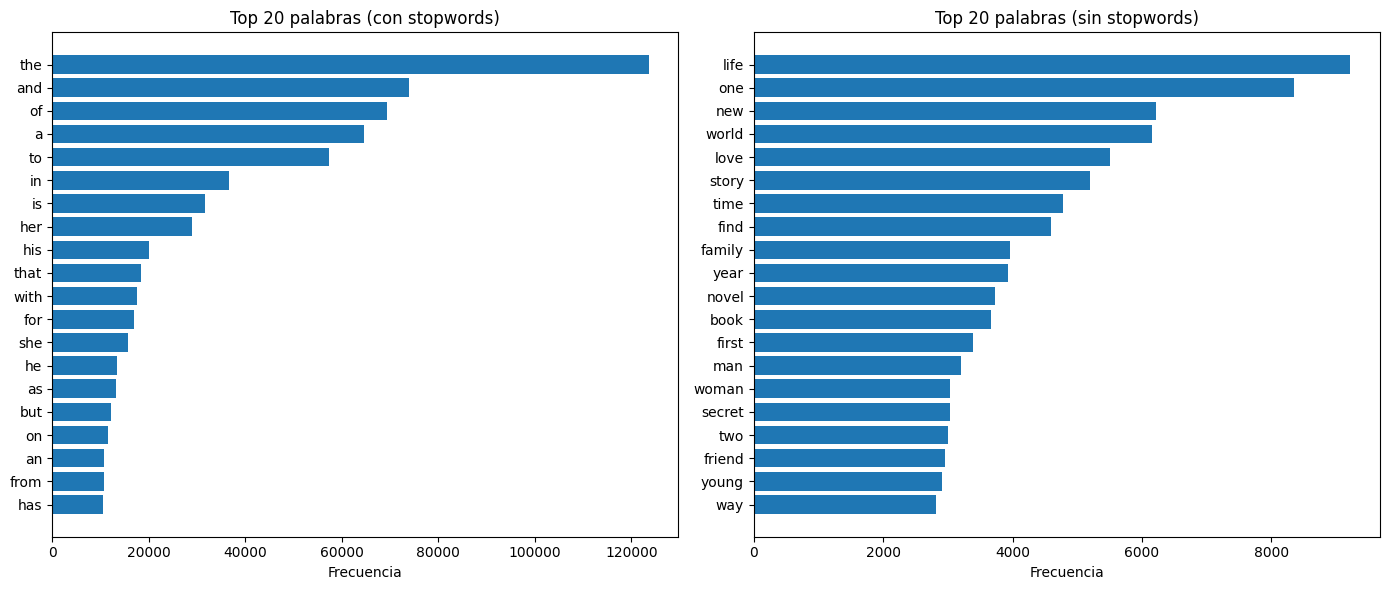

In [48]:
# Grafico de barras
# sin stopwords comparacion con stopwords

# Separar 20 Top palabras
top_20_con_stopwords = count_palabras_con_stopwords.most_common(20)
top_20_sin_stopwords = count_palabras_lem.most_common(20)

# Convertir en listas
words_con = [w for w, c in top_20_con_stopwords]
counts_con = [c for w, c in top_20_con_stopwords]

words_sin = [w for w, c in top_20_sin_stopwords]
counts_sin = [c for w, c in top_20_sin_stopwords]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico con stopwords
axes[0].barh(words_con, counts_con)
axes[0].set_title('Top 20 palabras (con stopwords)')
axes[0].set_xlabel('Frecuencia')
axes[0].invert_yaxis()

# Gráfico sin stopwords
axes[1].barh(words_sin, counts_sin)
axes[1].set_title('Top 20 palabras (sin stopwords)')
axes[1].set_xlabel('Frecuencia')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

#### n-gramas (bigrama)

In [49]:
# Crear lista de textos
texts = df_pos['descrip_lem_str'].tolist()

# Definir funcion
def top_ngrams(texts, ngram_range=(2,2), topk=20, min_df=5): # bigrama, aparece al menos en 5 documentos
  vec = CountVectorizer(ngram_range=ngram_range, min_df=min_df)
  X = vec.fit_transform(texts)
  # Sumar cada columna
  # Frecuencia total del n-grama en los textos
  freqs = zip(vec.get_feature_names_out(), X.sum(axis=0).A1)
  return (
      pd.DataFrame(
          sorted(freqs, key=lambda x: x[1], reverse=True)[:topk],
          columns=['ngram', 'freq']
        )
    )

In [50]:
genre = 'classics'

corpus_genre = (
    df_pos
    .loc[df_pos['main_genre'] == genre, 'descrip_lem_str']
    .dropna()
    .tolist()
)

top_bi_classics = top_ngrams(corpus_genre, (2,2), topk=20)
top_bi_classics

,ngram,freq
0,first published,40
1,sherlock holmes,35
2,short story,27
3,young man,19
4,edgar allan,17
5,fairy tale,17
6,tell story,17
7,allan poe,15
8,de la,15
9,new york,15


In [51]:
genre = 'fantasy'

corpus_genre = (
    df_pos
    .loc[df_pos['main_genre'] == genre, 'descrip_lem_str']
    .dropna()
    .tolist()
)

top_bi_fantasy = top_ngrams(corpus_genre, (2,2), topk=20)
top_bi_fantasy

,ngram,freq
0,new york,218
1,york time,151
2,time bestselling,119
3,bestselling author,97
4,fairy tale,97
5,find way,84
6,best friend,81
7,first time,76
8,must find,65
9,year ago,61


In [52]:
genre = 'young adult'

corpus_genre = (
    df_pos
    .loc[df_pos['main_genre'] == genre, 'descrip_lem_str']
    .dropna()
    .tolist()
)

top_bi_yadult = top_ngrams(corpus_genre, (2,2), topk=20)
top_bi_yadult

,ngram,freq
0,best friend,220
1,high school,182
2,new york,176
3,york time,101
4,time bestselling,85
5,bestselling author,68
6,one thing,61
7,first time,53
8,year ago,50
9,doesnt know,49


#### Worldcloud

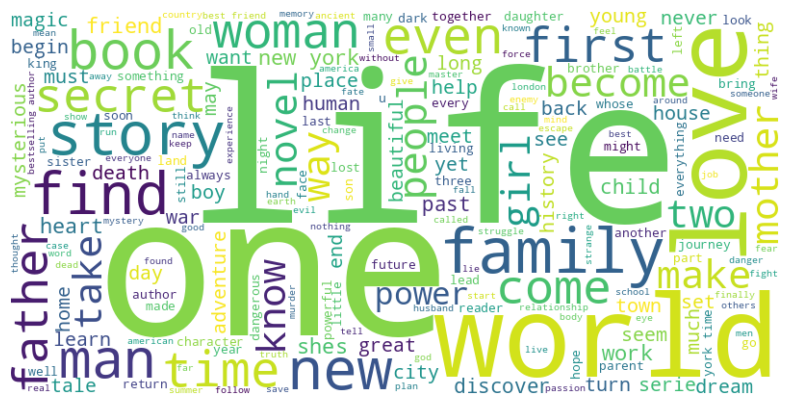

In [53]:
# Para realizar el worlcloud es necesario unificar todo el texto de la columna "descrip_lem"
df_reducido["descrip_lem_str"] = df_reducido["descrip_lem"].apply(lambda x: " ".join(x))
text = " ".join(df_reducido["descrip_lem_str"])

# Generar Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Mostrar WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

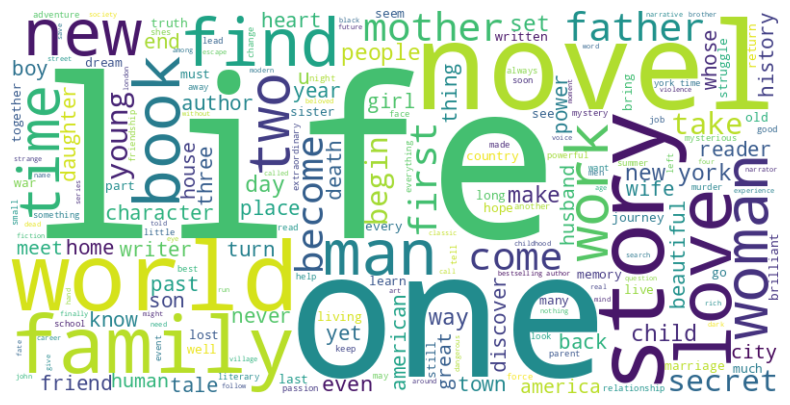

In [54]:
# WordCloud genero Fiction

# generar Df solo Fiction
df_fiction = df_reducido[df_reducido['main_genre'] == 'fiction'].copy()

# Unificar todo
df_fiction["descrip_lem_str"] = df_fiction["descrip_lem"].apply(lambda x: " ".join(x))
text_fiction = " ".join(df_fiction["descrip_lem_str"])

# Generar Word Cloud
wordcloud_fiction = WordCloud(width=800, height=400, background_color="white").generate(text_fiction)

# Mostrar WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fiction, interpolation="bilinear")
plt.axis("off")
plt.show()


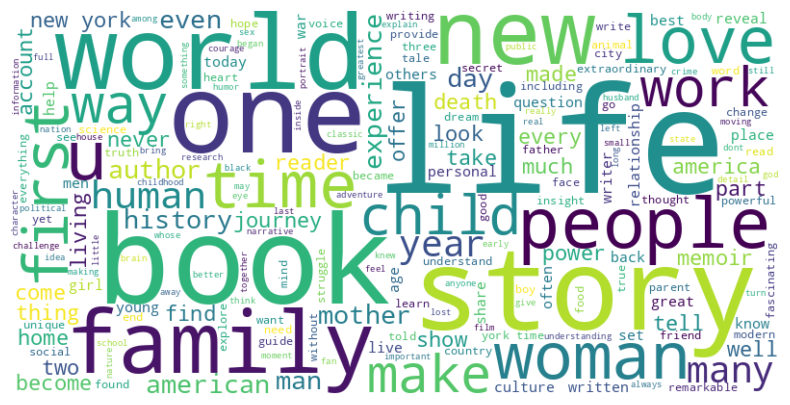

In [55]:
# WordCloud genero NonFiction

# generar Df solo NonFiction
df_nonfiction = df_reducido[df_reducido['main_genre'] == 'nonfiction'].copy()

# Unificar todo
df_nonfiction["descrip_lem_str"] = df_nonfiction["descrip_lem"].apply(lambda x: " ".join(x))
text_nonfiction = " ".join(df_nonfiction["descrip_lem_str"])

# Generar Word Cloud
wordcloud_nonfiction = WordCloud(width=800, height=400, background_color="white").generate(text_nonfiction)

# Mostrar WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_nonfiction, interpolation="bilinear")
plt.axis("off")
plt.show()

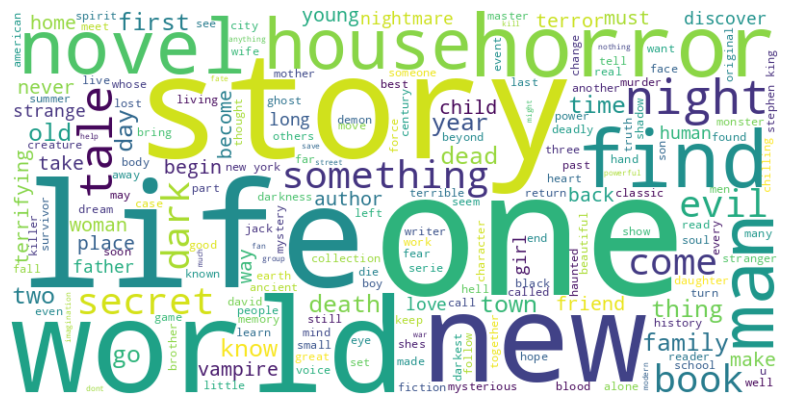

In [56]:
# WordCloud genero Horror

# generar Df solo Horror
df_horror = df_reducido[df_reducido['main_genre'] == 'horror'].copy()

# Unificar todo
df_horror["descrip_lem_str"] = df_horror["descrip_lem"].apply(lambda x: " ".join(x))
text_horror = " ".join(df_horror["descrip_lem_str"])

# Generar Word Cloud
wordcloud_horror = WordCloud(width=800, height=400, background_color="white").generate(text_horror)

# Mostrar WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_horror, interpolation="bilinear")
plt.axis("off")
plt.show()

**Observaciones**:
- Al mirar los cuatro WordClouds y las listas de POS (Part of Speech) por género se observan coincidencias en las palabras más prominentes
- Dentro de las mismas observo algunas que podría ser beneficioso remover, cómo: one, new, story, book, novel, author, new, york, published, bestselling, author.

In [57]:
# Remover palabras ruido comunes en descripciones de libros
custom_stopwords = {
    'bestselling', 'author', 'published', 'times', 'york', 'new', 'first', 'one', 'book', 'story', 'life'
}

In [58]:
# Remover stopwords the tokens
# Aplicando función lambda
df_reducido['descrip_token_sin_stopwords'] = df_reducido['descrip_token_sin_stopwords'].apply(lambda tokens: [token for token in tokens if token not in custom_stopwords])
df_reducido.head()

,title,description,genres,main_genre,descrip_puntuacion,descrip_token,descrip_token_sin_stopwords,descrip_lem,descrip_lem_str
0,Siddhartha,"herman hesse's classic novel has delighted, in...","[Classics, Fiction, Philosophy, Religion, Spir...",classics,herman hesses classic novel has delighted insp...,"[herman, hesses, classic, novel, has, delighte...","[herman, hesses, classic, novel, delighted, in...","[herman, hess, classic, novel, delighted, insp...",herman hess classic novel delighted inspired i...
1,The Years,the most popular of virginia woolf's novels du...,"[Classics, Fiction, Literature, 20th Century, ...",classics,the most popular of virginia woolfs novels dur...,"[the, most, popular, of, virginia, woolfs, nov...","[popular, virginia, woolfs, novels, lifetime, ...","[popular, virginia, woolf, novel, lifetime, ye...",popular virginia woolf novel lifetime year sav...
2,A Fair Barbarian,miss belinda bassett's niece arrives in a smal...,"[Classics, Fiction, Romance, Historical Fictio...",classics,miss belinda bassetts niece arrives in a small...,"[miss, belinda, bassetts, niece, arrives, in, ...","[miss, belinda, bassetts, niece, arrives, smal...","[miss, belinda, bassetts, niece, arrives, smal...",miss belinda bassetts niece arrives small engl...
3,The Return of The Soldier,this is a masterful novel about a shell-shocke...,"[Classics, Fiction, Historical Fiction, War, W...",classics,this is a masterful novel about a shellshocked...,"[this, is, a, masterful, novel, about, a, shel...","[masterful, novel, shellshocked, amnesiac, sol...","[masterful, novel, shellshocked, amnesiac, sol...",masterful novel shellshocked amnesiac soldier ...
4,The Romance of the Forest,set in a roman catholic europe of violent pass...,"[Classics, Gothic, Fiction, Romance, 18th Cent...",classics,set in a roman catholic europe of violent pass...,"[set, in, a, roman, catholic, europe, of, viol...","[set, roman, catholic, europe, violent, passio...","[set, roman, catholic, europe, violent, passio...",set roman catholic europe violent passion extr...


In [59]:
# Relematizar
lemmatizer = WordNetLemmatizer()

# Sobre la columna descrip_token_sin_stopwords
df_reducido['descrip_lem'] = df_reducido['descrip_token_sin_stopwords'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])
df_reducido.head()

,title,description,genres,main_genre,descrip_puntuacion,descrip_token,descrip_token_sin_stopwords,descrip_lem,descrip_lem_str
0,Siddhartha,"herman hesse's classic novel has delighted, in...","[Classics, Fiction, Philosophy, Religion, Spir...",classics,herman hesses classic novel has delighted insp...,"[herman, hesses, classic, novel, has, delighte...","[herman, hesses, classic, novel, delighted, in...","[herman, hess, classic, novel, delighted, insp...",herman hess classic novel delighted inspired i...
1,The Years,the most popular of virginia woolf's novels du...,"[Classics, Fiction, Literature, 20th Century, ...",classics,the most popular of virginia woolfs novels dur...,"[the, most, popular, of, virginia, woolfs, nov...","[popular, virginia, woolfs, novels, lifetime, ...","[popular, virginia, woolf, novel, lifetime, ye...",popular virginia woolf novel lifetime year sav...
2,A Fair Barbarian,miss belinda bassett's niece arrives in a smal...,"[Classics, Fiction, Romance, Historical Fictio...",classics,miss belinda bassetts niece arrives in a small...,"[miss, belinda, bassetts, niece, arrives, in, ...","[miss, belinda, bassetts, niece, arrives, smal...","[miss, belinda, bassetts, niece, arrives, smal...",miss belinda bassetts niece arrives small engl...
3,The Return of The Soldier,this is a masterful novel about a shell-shocke...,"[Classics, Fiction, Historical Fiction, War, W...",classics,this is a masterful novel about a shellshocked...,"[this, is, a, masterful, novel, about, a, shel...","[masterful, novel, shellshocked, amnesiac, sol...","[masterful, novel, shellshocked, amnesiac, sol...",masterful novel shellshocked amnesiac soldier ...
4,The Romance of the Forest,set in a roman catholic europe of violent pass...,"[Classics, Gothic, Fiction, Romance, 18th Cent...",classics,set in a roman catholic europe of violent pass...,"[set, in, a, roman, catholic, europe, of, viol...","[set, roman, catholic, europe, violent, passio...","[set, roman, catholic, europe, violent, passio...",set roman catholic europe violent passion extr...


## 5b. Etapa 2:

La segunda etapa del proyecto se enfoca en la implementación y evaluación de distintos modelos de aprendizaje automático orientados a la clasificación categórica, con el objetivo de predecir el género literario principal de un libro a partir de su descripción.

En esta fase, los datos previamente preparados son utilizados como entrada para entrenar diferentes modelos, cuyos resultados se comparan en función de métricas de desempeño relevantes. Este análisis comparativo permite identificar qué enfoques resultan más adecuados para capturar las relaciones entre el contenido textual de los resúmenes y los géneros literarios asociados.

Comenzaremos con modelos de Machine Learning y luego con modelos más complejos de Deep Learning. Previo prepararemos el dataframe dividiendolo en datos de entrenamiento y datos de prueba.

### División de dataframe en train y test

Construcción de data frame para entrenamiento del modelo. Dejando solamente el texto normalizado y la variable objetivo.

In [60]:
# Dejar solo lo necesario para el ml
# Primero transformar 'descrip_token_sin_stopwords' en str para TF-IDF
df_reducido['descrip_lem_str'] = df_reducido['descrip_lem'].apply(lambda x: " ".join(x))

# df_ml
df_ml = df_reducido[['main_genre', 'descrip_lem_str']].copy()

# Renombrar columnas
df_ml = df_ml.rename(columns={'main_genre': 'label', 'descrip_lem_str': 'text'})
df_ml.head()

,label,text
0,classics,herman hess classic novel delighted inspired i...
1,classics,popular virginia woolf novel lifetime year sav...
2,classics,miss belinda bassetts niece arrives small engl...
3,classics,masterful novel shellshocked amnesiac soldier ...
4,classics,set roman catholic europe violent passion extr...


In [61]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    df_ml['text'],
    df_ml['label'],
    test_size=0.2,
    random_state=42,
    stratify=df_ml['label'] # para mantener la proporción de géneros
)


### Machine Learning

Teniendo en cuenta que nuestra variable objetivo es categórica, y que hay 10 posibles categorias el modelo elegido es: Regresión Logistica Multinominal con TF-IDF .

#### Logistic Regression Multinominal

Utilizamos TF-IDF para el analisis de frecuencia de términos en el total de los textos, midiendo la relevancia de los mismos. Vectorización de los términos para el entrenamiento del modelo.

In [62]:
# Crear un vectorizador TF-IDF ( Instanciamos el vectorizador, es decir, creamos el objeto del modelo o herramienta a usar)
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    min_df=5,
    max_df=0.8
)

# Ajustar y transformar los datos de entrenamiento
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transformar los datos de prueba
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Crear un modelo de regresión logística
model = LogisticRegression(
    max_iter=1000,
    multi_class='multinomial',
    solver='lbfgs'
)

# Entrenar el modelo
model.fit(X_train_tfidf, y_train) # Fiteamos, es decir, el modelo aprende a partir de los datos de entrenamiento

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test_tfidf)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [63]:
# Evaluación del modelo

# Classification report
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

          classics       0.61      0.16      0.25       106
           fantasy       0.70      0.86      0.77       583
           fiction       0.54      0.79      0.64       599
historical fiction       0.65      0.42      0.51       234
            horror       0.93      0.14      0.24        93
           mystery       0.77      0.64      0.70       218
        nonfiction       0.82      0.67      0.74       254
           romance       0.73      0.71      0.72       340
   science fiction       0.90      0.55      0.69       154
       young adult       0.62      0.61      0.62       347

          accuracy                           0.66      2928
         macro avg       0.73      0.55      0.59      2928
      weighted avg       0.69      0.66      0.65      2928



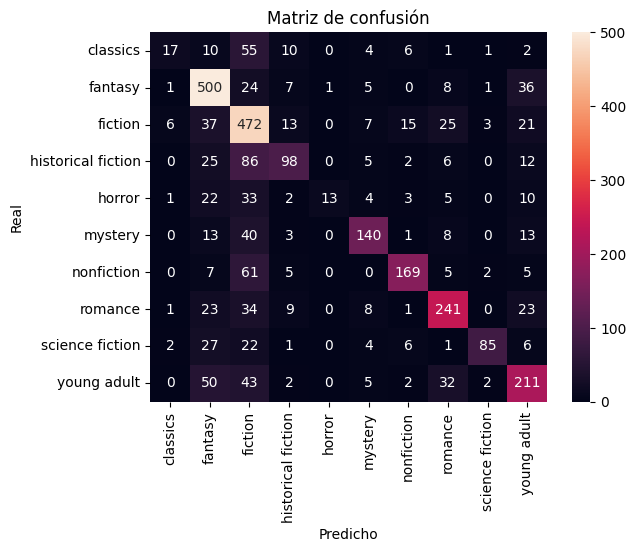

In [64]:
#Matriz de Confusión
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=model.classes_,
            yticklabels=model.classes_)

plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de confusión')
plt.show()

In [68]:
# Predicción de probabilidades
y_pred_proba = model.predict_proba(X_test_tfidf)

# Accuaracy y Loss
accuracy_log = accuracy_score(y_test, y_pred)
loss_log = log_loss(y_test, y_pred_proba)

print(f"Accuracy: {accuracy_log:.4f}")
print(f"Loss: {loss_log:.4f}")

Accuracy: 0.6646
Loss: 1.1022


- El reporte de clasificación y la matriz de confusión muestran que el modelo no alcanza niveles esperados de accuracy y presición.
- Hay diferencias según el género del libro.

### DeepLearning

Se probarán dos modelos de DeepLearning diferentes:

LSTM: Long-Short Term Memory

GRU: Gated Recurrent Unit

En ambos casos se probaran los mismos modelos con modificaciones.

#### LSTM

In [69]:
# Definir cantidad de géneros
num_clases = df_ml['label'].nunique()
num_clases

10

In [70]:
# Definimos la cantidad máxima de palabras que queremos considerar en el vocabulario
max_words = 20000
# Definimos la longitud máxima que cada reseña puede tener
max_len = 150

In [71]:
# Codificación de etiquetas (y)
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)

In [72]:
# Tokenizar TRAIN
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

In [73]:
# Secuencia númerica
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [74]:
# Pad Sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad  = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

In [75]:
# Creamos el modelo secuencial con una capa LSTM
model_lstm = Sequential([
    # Capa de Embedding: igual que antes
    Embedding(input_dim=max_words, output_dim=64, input_length=max_len),

    # Capa LSTM
    LSTM(64),

    # Capa de salida para clasificación multiclase
    Dense(num_clases, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [76]:
# Compilamos el modelo
model_lstm.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [77]:
# Entrenamiento del modelo
model_lstm.fit(
    X_train_pad,
    y_train_enc,
    validation_data=(X_test_pad, y_test_enc),
    epochs=5,
    batch_size=32
)

Epoch 1/5
366/366 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.2060 - loss: 2.1702 - val_accuracy: 0.2131 - val_loss: 2.1382
Epoch 2/5
366/366 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2060 - loss: 2.1314 - val_accuracy: 0.2094 - val_loss: 2.1399
Epoch 3/5
366/366 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2167 - loss: 2.1387 - val_accuracy: 0.1998 - val_loss: 2.1474
Epoch 4/5
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2017 - loss: 2.1436 - val_accuracy: 0.2073 - val_loss: 2.1266
Epoch 5/5
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2310 - loss: 2.0928 - val_accuracy: 0.3224 - val_loss: 1.9648


In [78]:
# Evaluar modelo
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test_pad, y_test_enc)

print(f"Pérdida en test: {loss_lstm:.4f}")
print(f"Precisión en test: {accuracy_lstm:.4f}")

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3241 - loss: 1.9707
Pérdida en test: 1.9648
Precisión en test: 0.3224


#### LSTM 2

In [79]:
# Modificación de longitu maxima
max_len_2 = 300

In [80]:
# Creamos el modelo secuencial con una capa LSTM
model_lstm = Sequential([
    # Capa de Embedding: igual que antes
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len_2),

    # Capa LSTM
    Bidirectional(LSTM(128, return_sequences=False, dropout=0.3, recurrent_dropout=0.3)),

    # Capa de salida para clasificación multiclase
    Dense(64, activation='relu'),
    Dense(num_clases, activation='softmax')
])

In [81]:
# Compilamos el modelo
model_lstm.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [82]:
# Observar el balance de la cantidad de registros por género
df_ml['label'].value_counts(normalize=True)*100

,proportion
label,
fiction,20.457650
fantasy,19.904372
young adult,11.857923
romance,11.584699
nonfiction,8.681694
historical fiction,7.998634
mystery,7.452186
science fiction,5.259563
classics,3.620219


In [83]:
# Balancear las clases
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_enc),
    y=y_train_enc
)

class_weights = dict(enumerate(class_weights))

In [84]:
# Entrenamiento modelo
model_lstm.fit(
    X_train_pad,
    y_train_enc,
    validation_data=(X_test_pad, y_test_enc),
    epochs=10,
    batch_size=32,
    class_weight=class_weights
)

Epoch 1/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 207s 548ms/step - accuracy: 0.1805 - loss: 2.2115 - val_accuracy: 0.3098 - val_loss: 1.7764
Epoch 2/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 195s 534ms/step - accuracy: 0.3569 - loss: 1.6383 - val_accuracy: 0.4269 - val_loss: 1.5835
Epoch 3/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 212s 579ms/step - accuracy: 0.6139 - loss: 1.0180 - val_accuracy: 0.4699 - val_loss: 1.6372
Epoch 4/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 194s 530ms/step - accuracy: 0.7710 - loss: 0.5878 - val_accuracy: 0.4980 - val_loss: 1.7432
Epoch 5/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 194s 529ms/step - accuracy: 0.8722 - loss: 0.3273 - val_accuracy: 0.4884 - val_loss: 2.0190
Epoch 6/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 194s 529ms/step - accuracy: 0.9201 - loss: 0.1987 - val_accuracy: 0.5154 - val_loss: 2.1464
Epoch 7/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 194s 530ms/step - accuracy: 0.9474 - loss: 0.1271 - val_accuracy: 0.5171 - val_loss: 2.3594
Epoch 8/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 194s 530ms/step - accuracy: 0.9648 -

In [85]:
# Evualuar
loss_lstm2, accuracy_lstm2 = model_lstm.evaluate(X_test_pad, y_test_enc)

print(f"Pérdida en test: {loss_lstm2:.4f}")
print(f"Precisión en test: {accuracy_lstm2:.4f}")

92/92 ━━━━━━━━━━━━━━━━━━━━ 15s 163ms/step - accuracy: 0.5322 - loss: 2.7875
Pérdida en test: 2.8383
Precisión en test: 0.5273


#### GRU

In [86]:
# Se crea el modelo GRU secuencial
model_gru = Sequential([
    Embedding(max_words, output_dim=96, input_length=max_len),
    Bidirectional(GRU(96, return_sequences=False)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(num_clases, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [87]:
# Compilar modelo
model_gru.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [88]:
# Muestra la arquitectura del modelo
model_gru.summary()

# Entrenar modelo
history_gru = model_gru.fit(
    X_train_pad,
    y_train_enc,
    validation_data=(X_test_pad, y_test_enc),
    epochs=6,
    batch_size=32,
    class_weight=class_weights
)

# Muestra la arquitectura del modelo
model_gru.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.1102 - loss: 2.2954 - val_accuracy: 0.2650 - val_loss: 1.8501
Epoch 2/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.3898 - loss: 1.6172 - val_accuracy: 0.4252 - val_loss: 1.5750
Epoch 3/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.6512 - loss: 0.9607 - val_accuracy: 0.4525 - val_loss: 1.6223
Epoch 4/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8249 - loss: 0.4498 - val_accuracy: 0.5396 - val_loss: 1.7135
Epoch 5/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9334 - loss: 0.1833 - val_accuracy: 0.5249 - val_loss: 2.0626
Epoch 6/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9551 - loss: 0.1307 - val_accuracy: 0.5342 - val_loss: 2.2465
Epoch 7/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9719 - loss: 0.0724 - val_accuracy: 0.5075 - val_loss: 2.6656
Epoch 8/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9790 - loss: 0.0619 - val_accu

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (32, 150, 96)          │     1,920,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (32, 192)              │       111,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (32, 192)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 64)               │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (32, 10)               │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,134,240 (23.40 MB)

 Trainable params: 2,044,746 (7.80 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,089,494 (15.60 MB)

In [89]:
# Evaluamos
loss_gru, accuracy_gru = model_gru.evaluate(X_test_pad, y_test_enc)

print(f"Pérdida en test: {loss_gru:.4f}")
print(f"Precisión en test: {accuracy_gru:.4f}")

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5377 - loss: 2.9136
Pérdida en test: 2.8991
Precisión en test: 0.5434


#### GRU con EarlyStopping

In [103]:
model_gru2 = Sequential([
      Embedding(max_words, 128, input_length=max_len),
      Bidirectional(GRU(128, dropout=0.3)),
      Dense(64, activation='relu'),
      Dropout(0.3),
      Dense(num_clases, activation='softmax')
  ])

model_gru2.compile(
      optimizer='adam',
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
  )

In [104]:
# Definir EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

In [105]:
# Muestra la arquitectura del modelo
model_gru2.summary()

# Reentrenar Modelo
history_gru_es = model_gru2.fit(
    X_train_pad,
    y_train_enc,
    validation_data=(X_test_pad, y_test_enc),
    epochs=15,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[early_stop]
)

# Muestra la arquitectura del modelo
model_gru2.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
366/366 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.1116 - loss: 2.2863 - val_accuracy: 0.2141 - val_loss: 1.9572
Epoch 2/15
366/366 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.3258 - loss: 1.6964 - val_accuracy: 0.4771 - val_loss: 1.4956
Epoch 3/15
366/366 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.6276 - loss: 0.9954 - val_accuracy: 0.5082 - val_loss: 1.5209
Epoch 4/15
366/366 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8093 - loss: 0.5160 - val_accuracy: 0.5324 - val_loss: 1.5717


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (32, 150, 128)         │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ (32, 256)              │       198,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (32, 10)               │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,325,728 (31.76 MB)

 Trainable params: 2,775,242 (10.59 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,550,486 (21.17 MB)

In [106]:
# Evaluamos
loss_gru2, accuracy_gru2 = model_gru2.evaluate(X_test_pad, y_test_enc)

print(f"Pérdida en test: {loss_gru2:.4f}")
print(f"Precisión en test: {accuracy_gru2:.4f}")

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4689 - loss: 1.4995
Pérdida en test: 1.4956
Precisión en test: 0.4771


## Comparación de resultados

A continuación se usarán visualizaciones y dataframes para comparar los resultados de los diferentes modelos de aprendizaje supervisados.

### Accuracy y Loss

In [110]:
# Comparación de resultados
results = pd.DataFrame({
    'Modelo': ['Logistic Regression', 'LSTM', 'LSTM 2', 'GRU', 'GRU con Early'],
    'Accuracy': [accuracy_log, accuracy_lstm, accuracy_lstm2, accuracy_gru, accuracy_gru2],
    'Loss': [loss_log, loss_lstm, loss_lstm2, loss_gru, loss_gru2]
})

results

,Modelo,Accuracy,Loss
0,Logistic Regression,0.664617,1.102212
1,LSTM,0.322404,1.964756
2,LSTM 2,0.527322,2.838277
3,GRU,0.543374,2.899130
4,GRU con Early,0.477117,1.495630


En el cuadro comparativo podemos observar que el modelo que obtuvo mejores resultados fue el de Machine Learning, Logistic Regression. A continuación se observan los mismos datos en cuadros visuales.

In [111]:
# Observación de Accuracy por modelo

fig = px.bar(
    results,
    x='Modelo',
    y='Accuracy',
    title='Accuracy por modelo',
    text='Accuracy'
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.show()

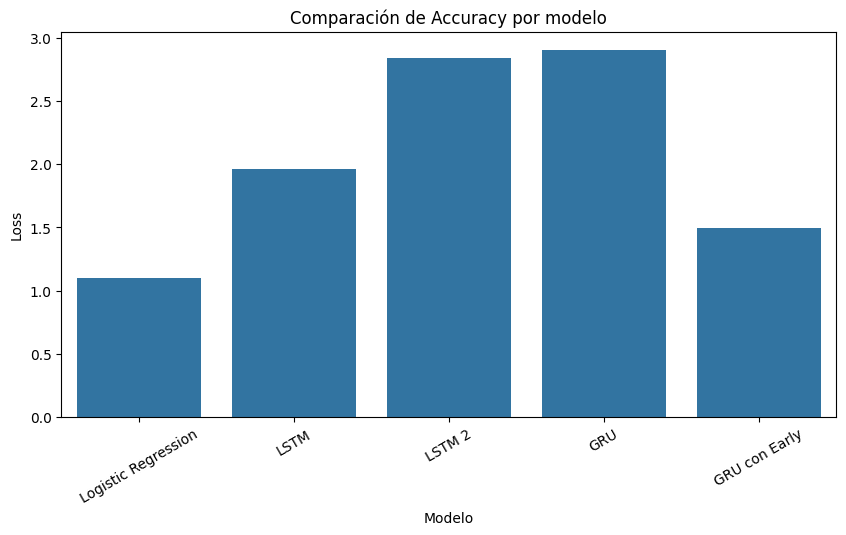

In [116]:
plt.figure(figsize=(10,5))
sns.barplot(data=results, x='Modelo', y='Loss')
plt.xticks(rotation=30)
plt.title('Comparación de Accuracy por modelo')
plt.show()

In [112]:
# Observación Accuracy vs Loss por modelo

fig = px.scatter(
    results,
    x='Loss',
    y='Accuracy',
    color='Modelo',
    size='Accuracy',
    title='Accuracy vs Loss'
)

fig.show()

### Palabras frecuentes

A continuación armaremos un cuadro comparativo que nos permitirá observar al mismo tiempo las 15 palabras más frecuentes de dos géneros a elegir.

In [131]:
# Crear función para armar dataframe que muestre un genero a definir, sus palabras más frecuentes y la frecuencia
def top_words_by_genre(model, vectorizer, le, genre_name, top_n=15):
    class_idx = list(le.classes_).index(genre_name)

    coef = model.coef_[class_idx]
    feature_names = vectorizer.get_feature_names_out()

    top_idx = np.argsort(coef)[-top_n:]

    return (
        pd.DataFrame({
            'Genero': genre_name,
            'Palabra': feature_names[top_idx],
            'Peso': coef[top_idx]
        })
        .sort_values(by='Peso', ascending=False)
        .reset_index(drop=True)
    )

In [146]:
# Elegir entre los siguientes generos para comparar: 'fiction', 'fantasy', 'young adult', 'romance', 'nonfiction', 'historical fiction',
# 'mystery', 'science fiction', 'classics', 'horror'
genre_a = 'young adult'
genre_b = 'mystery'

top_a = top_words_by_genre(model, tfidf_vectorizer, le, genre_a, top_n=15)
top_b = top_words_by_genre(model, tfidf_vectorizer, le, genre_b, top_n=15)

In [145]:
# Crear DataFrame comparativo pudiendo observar las palabras más frecuentes en los dos géneros elegidos
comparison = pd.concat(
    [
        top_a.rename(columns={
            'Genero': 'Genero_A',
            'Palabra': 'Palabra_A',
            'Peso': 'Peso_A'
        }),
        top_b.rename(columns={
            'Genero': 'Genero_B',
            'Palabra': 'Palabra_B',
            'Peso': 'Peso_B'
        })
    ],
    axis=1
)

comparison

,Genero_A,Palabra_A,Peso_A,Genero_B,Palabra_B,Peso_B
0,horror,horror,4.859452,mystery,detective,5.111463
1,horror,terror,3.238317,mystery,murder,4.923485
2,horror,evil,3.155272,mystery,mystery,4.207521
3,horror,house,2.662771,mystery,case,3.980990
4,horror,vampire,2.597827,mystery,killer,3.618672
5,horror,something,2.440055,mystery,nancy,3.297145
6,horror,terrifying,2.432883,mystery,missing,3.107686
7,horror,stephen king,2.411851,mystery,crime,3.044374
8,horror,nightmare,2.339357,mystery,clue,3.010723
9,horror,ghost,2.301256,mystery,investigation,2.749826


# 6. Conclusiones

Para comenzar las conclusiones voy a recordar las preguntas que guiaron este proyecto:
- ¿Existen relaciones entre la forma o palabras utilizadas en los resumenes de libros y el género prinicipal en el cual fueron categorizados? ¿Son esta relaciones suficientes para entrenar modelos de aprendizaje supervisado con resultados positivos?
- ¿Hay palabras que representan con mayor frecuencia el género principal en el cual fueron categorizados?

A partir de la exploración y análisis de las descripciones de los libros, se identificaron inicialmente términos compartidos entre los distintos géneros. Estos corresponden a palabras de uso general en el ámbito editorial, como book(libro), published(publicado) o bestseller, que no aportan información discriminativa para la clasificación.

Una vez eliminados estos términos, se observaron diferencias claras en el vocabulario predominante según el género principal. En el caso de Young Adult, aparece un léxico asociado a experiencias juveniles y vínculos interpersonales; en Horror se destacan términos vinculados a criaturas, amenazas y elementos sobrenaturales; mientras que en Mystery predominan palabras relacionadas con la investigación, el crimen y la resolución de enigmas. Estos resultados confirman la existencia de patrones lingüísticos característicos por género.

Con un conjunto de 14.640 registros, se entrenaron distintos modelos de aprendizaje supervisado, tanto clásicos como de Deep Learning. Si bien todos los modelos lograron capturar parcialmente estas relaciones, ninguno alcanzó niveles de precisión superiores al 70 %, evidenciando dificultades para generalizar correctamente.

Estos resultados sugieren que, si bien existen diferencias lingüísticas claras entre los géneros, la complejidad del lenguaje natural, la superposición semántica entre categorías literarias y la cantidad limitada de datos por clase pueden haber afectado el desempeño de los modelos. En consecuencia, se concluye que, para este problema, las características textuales extraídas resultan informativas, pero no suficientes por sí solas para lograr una clasificación altamente precisa con los recursos utilizados.

# 7. Perspectivas futuras del proyectos

A partir de los resultados obtenidos y de las conclusiones alcanzadas, se identifican distintas acciones que podrían mejorar el alcance y desempeño del proyecto:

- Refinar los filtros de preprocesamiento, eliminando de forma más precisa aquellas palabras que no aportan información discriminativa para la clasificación.

- Incrementar la cantidad de registros utilizados para el entrenamiento de los modelos, con el objetivo de mejorar su capacidad de generalización.

- Implementar modelos de lenguaje más avanzados, capaces de capturar relaciones semánticas más complejas propias del lenguaje natural.

- Incorporar variables adicionales, como la editorial o el año de publicación, que permitan enriquecer el contexto y mejorar la interpretación de los textos.